In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Creating a hierarchical cluster with a small custom DataFrame (15-20 well known fighters).
I am not using the Kaggle UFC dataset because the stats on the UFC website are better suited for this particular task. The only problem is that there is no simple way of getting stats for all the fighters so they have to be entered manually, but as the number of fighters and attributes is rather small it is not a problem and we do not have to worry about fixing missing or wrong values either (in other words the quality of the data is as good as possible).

In [2]:
#Stats taken from website: https://www.ufc.com/athlete
#Features that we will be using for our seleceted fighters are
#Striking accuracy -F1
#Grappling accuracy -F2
#Significant strikes landed (average per minute) -F3
#Significant strikes absorbed (average per minute) -F4
#Significant strike defense (%) -F5
#Takedown defense (%) -F6
#Takedown average (per 15 minutes) -F7
#Submission avaregae (per 15 minutes) -F8
#Knockdown ratio -F9
#Average fight time (minutes) -F10
#Strikes standing (%) -F11
#Strikes clinch (%) -F12
#Strikes ground(%) -F13
#Strikes targeting head(%) -F14
#Strikes targeting body(%) -F15
#Strikes targeting legs(%) -F16
#Win knockout (%) -F17
#Win decision (%) -F18
#Win submission (%) -F19
columns = ['Name', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19']
f1 = ['Conor McGregor', 0.49, 0.63, 5.43, 4.40, 0.55, 0.7, 0.75, 0.0, 1.95, 8.33, 0.76, 0.11, 0.13, 0.7, 0.17, 0.13, 0.87, 0.09, 0.04]
f2 = ['Kamaru Usman', 0.53, 0.51, 4.6, 2.17, 0.6, 1, 3.44, 0.16, 0.41, 16.67, 0.51, 0.18, 0.31, 0.62, 0.29, 0.09, 0.44, 0.5, 0.06]
f3 = ['Isarel Adesanya', 0.49, 0, 3.96, 2.4, 0.66, 0.87, 0.0, 0.35, 1.18, 15.88, 0.88, 0.08, 0.04, 0.54, 0.17, 0.28, 0.74, 0.26, 0]
f4 = ['Jon Jones', 0.58, 0.44, 4.30, 2.22, 0.64, 0.95, 1.85, 0.44, 0.22, 15.47, 0.65, 0.17, 0.18, 0.47, 0.25, 0.29, 0.43, 0.3, 0.26]
f5 = ['Khabib Nurmagomedov', 0.5, 0.45, 4.29, 1.7, 0.67, 0.85, 5.09, 0.59, 0.2, 13.93, 0.4, 0.04, 0.56, 0.87, 0.08, 0.05, 0.29, 0.36, 0.36]
f6 = ['Georges Saint-Pierre', 0.53, 0.74, 3.83, 1.5, 0.73, 0.84, 3.94, 1.05, 0.39, 15.57, 0.58, 0.07, 0.35, 0.65, 0.19, 0.17, 0.31, 0.46, 0.23]
f7 = ['Robert Whittaker', 0.41, 0.57, 4.82, 3.65, 0.61, 0.84, 0.37, 0.0, 0.75, 12.33, 0.82, 0.09, 0.09, 0.7, 0.13, 0.17, 0.45, 0.32, 0.23]
f8 = ['Alexander Volkanovski', 0.57, 0.35, 6.15, 3.14, 0.6, 0.73, 2.16, 0.4, 0.54, 13.92, 0.65, 0.13, 0.22, 0.59, 0.12, 0.29, 0.52, 0.33, 0.14]
f9 = ['Jan Blachowicz', 0.49, 0.52, 3.45, 2.77, 0.54, 0.66, 1.16, 0.27, 0.45, 12.02, 0.71, 0.15, 0.14, 0.66, 0.22, 0.12, 0.27, 0.38, 0.35]
f10 = ['Daniel Cormier', 0.54, 0.46, 4.42, 3.95, 0.56, 0.77, 1.81, 0.66, 0.16, 13.03, 0.56, 0.25, 0.19, 0.76, 0.13, 0.11, 0.45, 0.32, 0.23]
f11 = ['Stipe Miocic', 0.52, 0.38, 4.95, 3.69, 0.57, 0.73, 2.2, 0, 0.53, 10.65, 0.68, 0.12, 0.19, 0.76, 0.12, 0.12, 0.79, 0.21, 0]
f12 = ['Tony Ferguson', 0.45, 0.43, 5.51, 3.55, 0.64, 0.77, 0.6, 1.49, 0.3, 10.07, 0.89, 0.03, 0.08, 0.64, 0.16, 0.2, 0.5, 0.19, 0.31]
f13 = ['Gilbert Burns', 0.46, 0.37, 3.15, 2.74, 0.57, 0.5, 2.21, 0.71, 0.35, 11.28, 0.67, 0.13, 0.2, 0.59, 0.23, 0.18, 0.33, 0.22, 0.44]
f14 = ['Jorge Masvidal', 0.48, 0.52, 4.11, 4.18, 0.67, 0.78, 1.16, 0.51, 0.43, 12.97, 0.7, 0.17, 0.13, 0.62, 0.24, 0.14, 0.46, 0.49, 0.06]
f15 = ['Max Holloway', 0.45, 0.83, 6.66, 4.45, 0.62, 0.85, 0.24, 0.39, 0.39, 14.13, 0.84, 0.09, 0.07, 0.74, 0.21, 0.05, 0.48, 0.43, 0.1]
f16 = ['Brian Ortega', 0.34, 0.17, 4.07, 7.36, 0.51, 0.56, 0.51, 1.36, 0.51, 11.02, 0.87, 0.08, 0.05, 0.78, 0.18, 0.04, 0.21, 0.29, 0.5]
f17 = ['Petr Yan', 0.46, 0.53, 5.65, 3.15, 0.68, 0.88, 1.73, 0.22, 1.52, 11.53, 0.67, 0.17, 0.15, 0.75, 0.2, 0.04, 0.43, 0.5, 0.07]
f18 = ['Deiveson Figueiredo', 0.52, 0.5, 2.43, 2.15, 0.56, 0.59, 1.86, 2.27, 1.03, 12.12, 0.52, 0.13, 0.35, 0.69, 0.28, 0.02, 0.45, 0.15, 0.4]
fighters = pd.DataFrame(data = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18], columns=columns)

In [3]:
#How the custom dataset looks
fighters.head(5)

,Name,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,Conor McGregor,0.49,0.63,5.43,4.40,0.55,0.70,0.75,0.00,1.95,8.33,0.76,0.11,0.13,0.70,0.17,0.13,0.87,0.09,0.04
1,Kamaru Usman,0.53,0.51,4.60,2.17,0.60,1.00,3.44,0.16,0.41,16.67,0.51,0.18,0.31,0.62,0.29,0.09,0.44,0.50,0.06
2,Isarel Adesanya,0.49,0.00,3.96,2.40,0.66,0.87,0.00,0.35,1.18,15.88,0.88,0.08,0.04,0.54,0.17,0.28,0.74,0.26,0.00
3,Jon Jones,0.58,0.44,4.30,2.22,0.64,0.95,1.85,0.44,0.22,15.47,0.65,0.17,0.18,0.47,0.25,0.29,0.43,0.30,0.26
4,Khabib Nurmagomedov,0.50,0.45,4.29,1.70,0.67,0.85,5.09,0.59,0.20,13.93,0.40,0.04,0.56,0.87,0.08,0.05,0.29,0.36,0.36


Creating dendrogram with complete linkage

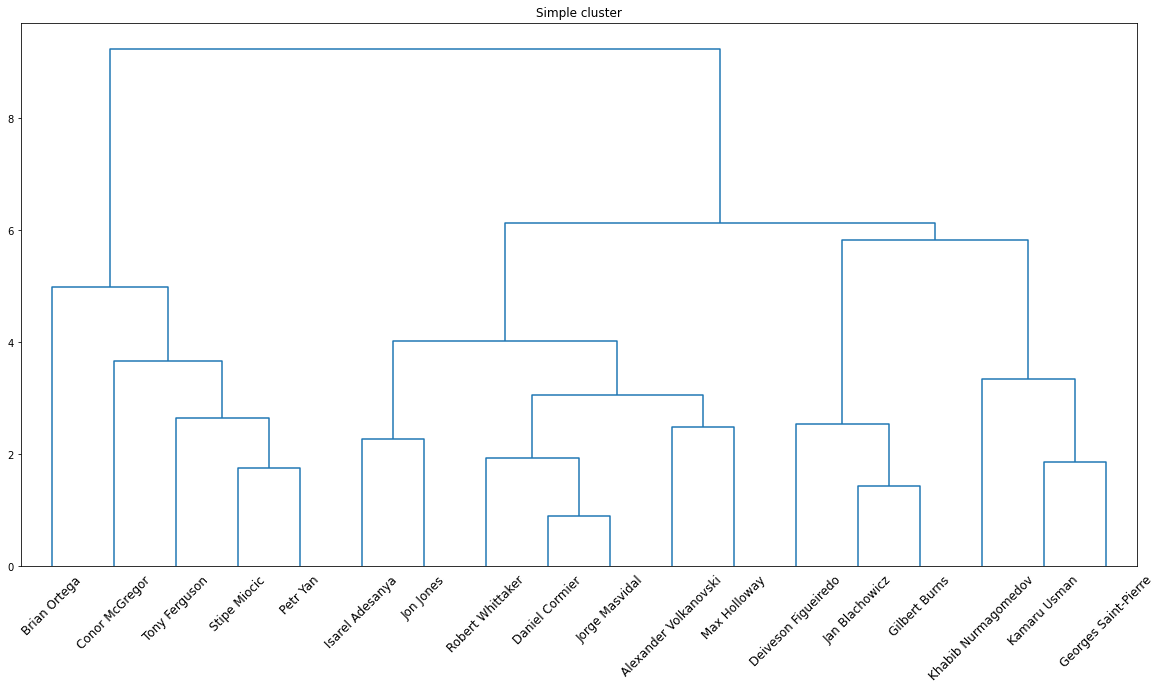

In [4]:
from scipy.cluster import hierarchy
plt.figure(figsize=(20, 10))
complete = hierarchy.linkage(fighters.drop(columns='Name'), 'complete')
plt.title('Simple cluster')
cluster = hierarchy.dendrogram(complete, labels=fighters['Name'].tolist(), color_threshold=0)
plt.xticks(rotation=45)
plt.show()

Creating a scatterplot with principal component analysis

In [5]:
from sklearn.decomposition import PCA
pca = pd.DataFrame(PCA(n_components=2).fit_transform(fighters.iloc[:, 1:]))
names = fighters['Name']
pca.columns = ['PCA1', 'PCA2']
pca['Name'] = names
pca

,PCA1,PCA2,Name
0,4.761200,-0.713764,Conor McGregor
1,-4.293723,0.423926,Kamaru Usman
2,-2.363971,2.019598,Isarel Adesanya
3,-2.765749,0.684433,Jon Jones
4,-2.751244,-2.378829,Khabib Nurmagomedov
5,-3.854961,-1.150183,Georges Saint-Pierre
6,1.045303,0.939432,Robert Whittaker
7,-0.987533,0.848544,Alexander Volkanovski
8,0.544211,-0.673437,Jan Blachowicz
9,0.017772,0.288935,Daniel Cormier


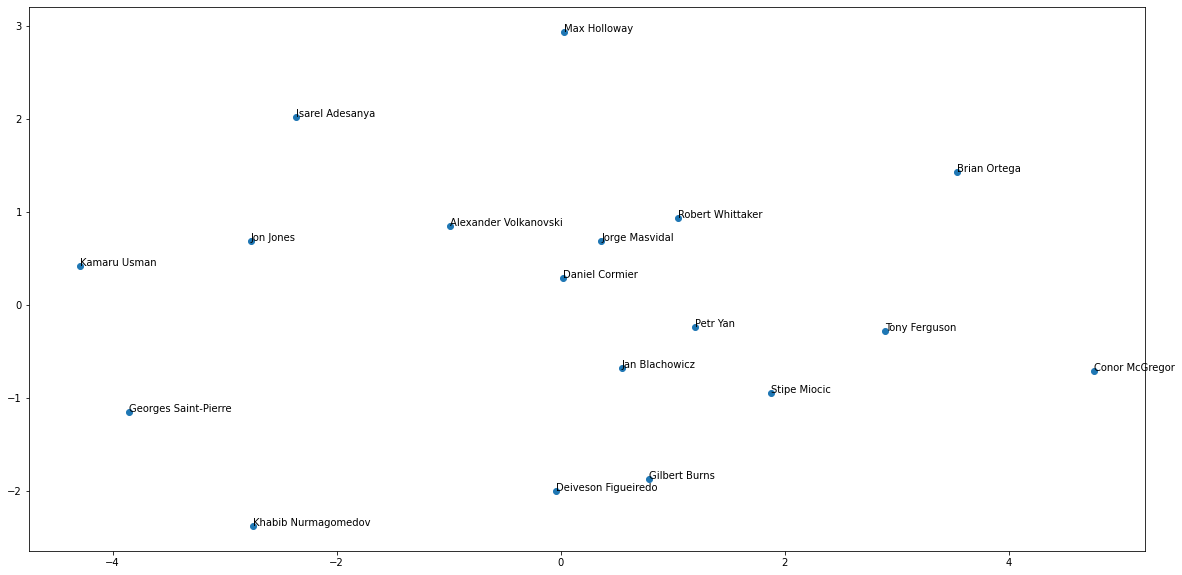

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(pca['PCA1'], pca['PCA2'])
for i in range(len(names)):
    plt.annotate(names.iloc[i], (pca['PCA1'].iloc[i], pca['PCA2'].iloc[i]))
plt.show()